In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import numpy as np
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from tqdm import tqdm  # Import tqdm for the progress bar
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize

In [2]:
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.ensemble import RandomForestClassifier

In [3]:
from feature_engine.selection import DropCorrelatedFeatures

# Import data

In [4]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [5]:
close_corr =data.corr(method = 'pearson')
close_corr

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
mean_atomic_mass,1.000000,0.815443,0.940210,0.745262,-0.104175,-0.098096,0.125842,0.446325,0.196643,0.130723,...,0.305133,0.392666,0.321934,-0.156998,-0.146226,-0.107039,0.170750,-0.079766,-0.081024,-0.113162
wtd_mean_atomic_mass,0.815443,1.000000,0.847636,0.964012,-0.308124,-0.413358,-0.143792,0.717191,-0.060526,-0.089369,...,0.545974,0.539945,0.549390,-0.375807,-0.331365,-0.038183,0.332698,-0.002807,0.077983,-0.311954
gmean_atomic_mass,0.940210,0.847636,1.000000,0.856449,-0.189982,-0.232456,-0.175801,0.458534,-0.121735,-0.166169,...,0.428030,0.511756,0.450532,-0.306164,-0.308083,-0.164446,0.274154,-0.124097,-0.117175,-0.229885
wtd_gmean_atomic_mass,0.745262,0.964012,0.856449,1.000000,-0.370411,-0.485170,-0.351986,0.673826,-0.274412,-0.331811,...,0.614231,0.608412,0.623435,-0.477714,-0.448308,-0.077587,0.411259,-0.032439,0.030924,-0.369429
entropy_atomic_mass,-0.104175,-0.308124,-0.189982,-0.370411,1.000000,0.889471,0.537854,-0.285161,0.356920,0.412836,...,-0.585717,-0.553177,-0.591685,0.963558,0.861150,0.202634,-0.349133,0.087673,0.018792,0.542854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,-0.107039,-0.038183,-0.164446,-0.077587,0.202634,0.160734,0.208458,0.023641,0.192080,0.177327,...,0.113189,-0.039978,0.034796,0.154607,0.203963,1.000000,0.114614,0.973837,0.867507,-0.144641
wtd_range_Valence,0.170750,0.332698,0.274154,0.411259,-0.349133,-0.546303,-0.363967,0.595038,-0.271879,-0.389699,...,0.684399,0.533512,0.682172,-0.416558,-0.639381,0.114614,1.000000,0.184713,0.132202,-0.439821
std_Valence,-0.079766,-0.002807,-0.124097,-0.032439,0.087673,0.056051,0.134726,0.067124,0.144277,0.123676,...,0.187765,0.035886,0.109815,0.034199,0.089699,0.973837,0.184713,1.000000,0.885844,-0.208882
wtd_std_Valence,-0.081024,0.077983,-0.117175,0.030924,0.018792,-0.006994,0.102883,0.093093,0.122862,0.156034,...,0.259755,0.089327,0.169942,-0.017114,0.081537,0.867507,0.132202,0.885844,1.000000,-0.300651


# Data preparation

In [6]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]



X.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [7]:
y.head()

0    29.0
1    26.0
2    19.0
3    22.0
4    23.0
Name: critical_temp, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

## Remove correlated: Feature-engine
#### Smart approach
###### _From each group of correlated variables, we retain the one with the highest importance, derived from a machine learning model._

In [9]:

sel = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.9,
    selection_method='model_performance',
    estimator=RandomForestRegressor(n_estimators=20, random_state=30),
    scoring='r2', 
    cv=3,
)

# fit finds the correlated features
sel.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestRegressor(n_estimators=20,
                                                         random_state=30),
                         scoring='r2', selection_method='model_performance',
                         threshold=0.9)

In [13]:
sel.features_to_drop_

['mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'range_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'wtd_mean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'range_fie',
 'wtd_std_fie',
 'mean_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'entropy_Density',
 'range_Density',
 'wtd_std_Density',
 'range_ElectronAffinity',
 'mean_FusionHeat',
 'wtd_mean_FusionHeat',
 'entropy_FusionHeat',
 'range_FusionHeat',
 'wtd_std_FusionHeat',
 'range_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'mean_Valence',
 'wtd_mean_Valence',
 'gmean_Valence',
 'entropy_Valence',
 'range_Valence']

In [14]:
sel.correlated_feature_sets_

[{'gmean_atomic_mass', 'mean_atomic_mass'},
 {'wtd_gmean_atomic_mass', 'wtd_mean_atomic_mass'},
 {'entropy_Density',
  'entropy_FusionHeat',
  'entropy_Valence',
  'entropy_atomic_mass',
  'entropy_atomic_radius',
  'entropy_fie'},
 {'wtd_entropy_Valence',
  'wtd_entropy_atomic_mass',
  'wtd_entropy_atomic_radius'},
 {'range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass'},
 {'gmean_fie', 'mean_fie'},
 {'wtd_gmean_atomic_radius', 'wtd_gmean_fie', 'wtd_mean_fie'},
 {'range_atomic_radius', 'range_fie', 'std_fie', 'wtd_std_fie'},
 {'gmean_atomic_radius', 'mean_atomic_radius'},
 {'std_atomic_radius', 'wtd_std_atomic_radius'},
 {'wtd_gmean_Density', 'wtd_mean_Density'},
 {'range_Density', 'std_Density', 'wtd_std_Density'},
 {'range_ElectronAffinity', 'std_ElectronAffinity'},
 {'gmean_FusionHeat', 'mean_FusionHeat', 'wtd_mean_FusionHeat'},
 {'range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat'},
 {'range_ThermalConductivity',
  'std_ThermalConductivity',
  'wtd_std_ThermalConduc

In [15]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((16954, 47), (4239, 47))

In [16]:
X_train_t.head()

,gmean_atomic_mass,wtd_gmean_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,gmean_fie,wtd_entropy_fie,wtd_range_fie,std_fie,wtd_mean_atomic_radius,gmean_atomic_radius,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
15511,18.464990,12.621306,56.509256,43.098264,918.814666,0.711383,592.635326,256.716476,115.880435,110.098892,...,4.651179,0.693425,0.109671,37.925750,38.963777,2.112285,0.499845,2.125000,1.247219,1.490191
2892,52.075936,35.756780,30.220725,50.602625,808.929244,0.738144,652.408886,326.649119,103.148096,110.717078,...,0.592118,0.140516,0.232107,56.402156,185.567013,2.242349,0.971125,0.871650,0.471405,0.450016
3650,60.708840,32.373992,10.224831,35.914688,663.564846,1.046750,695.457692,260.170348,108.846154,155.077951,...,1.054309,1.144411,0.723486,61.524149,137.774946,2.102339,1.487321,1.030769,0.451754,0.328525
9028,72.746865,42.654930,25.221983,70.392496,838.584885,0.983628,596.564755,301.512840,123.268817,131.729022,...,0.790837,0.270718,0.374856,47.775848,169.524558,2.000000,1.189049,0.805257,0.000000,0.000000
19291,80.031150,72.474689,27.375579,34.981246,696.141845,1.222394,345.123600,150.346381,152.728000,168.727482,...,51.921398,1.445288,1.177546,26.836000,30.676375,3.567305,1.193692,1.824000,1.019804,1.100138


# Scaling

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_t)

X_test_sc=min_max_scaler.fit_transform(X_test_t)

In [18]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline

In [40]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor

In [41]:
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)

In [42]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [43]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0766
Test MAE (LR_baseline) : 0.0825 

Train R^2 (LR_baseline): 0.7092
Test R^2 (LR_baseline) : 0.6482 



In [44]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import lightgbm as ltb

In [21]:
list_of_models = [        
        RandomForestRegressor(),
        XGBRegressor(),
        KNeighborsRegressor(),
        LGBMRegressor(),
        SVR()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=30,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                         fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  114.753557    0.035710               -0.002731
XGBRegressor            16.648882    0.003771               -0.003003
KNeighborsRegressor      0.007202    0.111359               -0.003422
LGBMRegressor            1.192172    0.006087               -0.003262
SVR                      6.199766    0.350837               -0.006543


In [22]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=5,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  25.112058    0.051861               -0.003058


In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# RandomForestRegressor

In [26]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Misi\AppData\Local\Temp\ipykernel_14632\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.006497983173165674
Mean Absolute Error (MAE): 0.055646491387988675
R-squared (R2): 0.8114539737603589
mape: 9.327335741942893


In [21]:
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize


param_space = {
    'n_estimators': Integer(100, 1000),
    
    'max_depth': Integer(5, 50),
    'min_samples_split': Real(0.01, 0.5),
    'min_samples_leaf': Real(0.01, 0.5),
    
    'max_leaf_nodes': Integer(10, 100),
    
    'max_samples': Real(0.1, 1.0)
}

# Create Random Forest Regressor object
rf = RandomForestRegressor()

# Define Bayesian Search Cross Validation object with 20 iterations
bayes_cv = BayesSearchCV(
    rf,
    param_space,
    n_iter=50,
    cv=5,
    verbose=0,
    n_jobs=-1
)

# Fit the model with bayesian optimization search
bayes_cv.fit(X_train_sc, y_train_sc)

# Get the best hyperparameters
best_params = bayes_cv.best_params_

# Create a new Random Forest Regressor object with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf, X_train_sc, y_train_sc, cv=5)

# Print the best hyperparameters and the cross-validation scores
print("Best hyperparameters: ", best_params)
print("Cross-validation scores: ", cv_scores)

C:\Users\Misi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Misi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Misi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Misi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed 

Best hyperparameters:  OrderedDict([('max_depth', 35), ('max_leaf_nodes', 100), ('max_samples', 1.0), ('min_samples_leaf', 0.01), ('min_samples_split', 0.01), ('n_estimators', 1000)])
Cross-validation scores:  [0.81405441 0.8161987  0.83704905 0.82107625 0.82557783]


In [22]:
best_params = {
   
    'max_depth': 35 ,
    
    'max_leaf_nodes': 100 ,
    'max_samples': 1.0  ,
    'min_samples_leaf': 0.01 ,
    'min_samples_split': 0.01,
    'n_estimators': 1000,
   
}

# Create a new Random Forest Regressor object with the best hyperparameters
rf = RandomForestRegressor(**best_params)

# Fit the model on the training data
rf.fit(X_train_sc, y_train_sc)

# Make predictions on the training data
y_pred_1_tun = rf.predict(X_test_sc)
mse = mean_squared_error(y_test_sc, y_pred_1_tun)
mae = mean_absolute_error(y_test_sc, y_pred_1_tun)
r2 = r2_score(y_test_sc, y_pred_1_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Misi\AppData\Local\Temp\ipykernel_14524\2605964618.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.007744048862034541
Mean Absolute Error (MAE): 0.060034815264587496
R-squared (R2): 0.7752980269367342
mape: 10.361550008504292


# XGBRegressor

In [27]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.006248938306462707
Mean Absolute Error (MAE): 0.05424883666406308
R-squared (R2): 0.8186802805575415
mape: 7.3783311345651175


In [31]:
import xgboost as xgb
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize

In [23]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer



param_space = {
    'eta': Real(0.001, 1.0, 'log-uniform'),
    'gamma': Real(0.001, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 15),
    'min_child_weight': Integer(1, 10),
    'max_delta_step': Real(0.001, 10.0, 'log-uniform'),
    'lambda': Real(0.001, 10.0, 'log-uniform'),
    'alpha': Real(0.001, 10.0, 'log-uniform'),
    'tree_method': (['auto', 'exact', 'approx', 'hist', 'gpu_hist']),
    'learning_rate': Real(0.001, 1.0, 'log-uniform'),    
    'max_leaves': Integer(2, 256)
}

model = XGBRegressor(random_state=42)

# Define the search algorithm with reduced n_iter and n_jobs
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,  # Reduce the number of iterations
    scoring='neg_mean_squared_error',
    cv=5,  # Number of cross-validation folds
    n_jobs=1,  # Use a single CPU core
    verbose=0
)

# Perform the search
search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

Best hyperparameters: OrderedDict([('alpha', 0.001), ('eta', 0.001), ('gamma', 1.0), ('lambda', 10.0), ('learning_rate', 0.24517470326407614), ('max_delta_step', 10.0), ('max_depth', 15), ('max_leaves', 256), ('min_child_weight', 10), ('tree_method', 'hist')])
Best MSE score: 97.4502977872729


In [24]:
model_2_tun = XGBRegressor(random_state=42, alpha=0.001, 
                            eta=0.001, gamma=1.0, reg_lambda= 10.0, 
                            learning_rate=0.24517470326407614, 
                            max_delta_step=10.0, max_depth=15,
                            max_leaves=256, min_child_weight=10, tree_method='hist')
model_2_tun.fit(X_train_sc, y_train_sc)
y_pred_2_tun = model_2_tun.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2_tun)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun)
r2 = r2_score(y_test_sc, y_pred_2_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.00901264454068988
Mean Absolute Error (MAE): 0.06917886108850355
R-squared (R2): 0.73848834803467
mape: 10.288063206323859


In [45]:
param_space = {
    'eta': Real(0.001, 1.0, 'log-uniform'),
    'gamma': Real(0.001, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 15),
    'min_child_weight': Integer(1, 10),
    'max_delta_step': Real(0.001, 10.0, 'log-uniform'),
    'lambda': Real(0.001, 10.0, 'log-uniform'),
    'alpha': Real(0.001, 10.0, 'log-uniform'),
    'tree_method': (['auto', 'exact', 'approx', 'hist', 'gpu_hist']),
    'learning_rate': Real(0.001, 1.0, 'log-uniform'),    
    'max_leaves': Integer(2, 256)
}

model = XGBRegressor(random_state=42)

# Define the search algorithm with reduced n_iter and n_jobs
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=200,  # Reduce the number of iterations
    scoring='neg_mean_squared_error',
    cv=10,  # Number of cross-validation folds
    n_jobs=1,  # Use a single CPU core
    verbose=0
)

# Perform the search
search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

Best hyperparameters: OrderedDict([('alpha', 10.0), ('eta', 0.0012680116105028099), ('gamma', 0.9745219247422688), ('lambda', 10.0), ('learning_rate', 0.6649011058872456), ('max_delta_step', 2.0190945580638116), ('max_depth', 14), ('max_leaves', 186), ('min_child_weight', 2), ('tree_method', 'approx')])
Best MSE score: 93.11631084312944


In [47]:
model_2_tun_2 = XGBRegressor(random_state=42, alpha=10.0, 
                            eta=0.0012680116105028099, gamma=0.9745219247422688, reg_lambda= 10.0, 
                            learning_rate=0.6649011058872456, 
                            max_delta_step=2.0190945580638116, max_depth=14,
                            max_leaves=186, min_child_weight=2, tree_method='approx')
model_2_tun_2.fit(X_train_sc, y_train_sc)
y_pred_2_tun_2 = model_2_tun_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2_tun_2)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_2)
r2 = r2_score(y_test_sc, y_pred_2_tun_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.008601358931433692
Mean Absolute Error (MAE): 0.06525304311913666
R-squared (R2): 0.7504222458623901
mape: 11.480301954637753


In [50]:
param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}

# Initialize Trials to keep track of results
trials = Trials()

# Define the number of iterations for optimization
num_iterations = 100

# Run the hyperparameter optimization with a progress bar
best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|██████████| 100/100 [15:33<00:00,  9.34s/iter]

Best hyperparameters: {'alpha': 0.0029848428282041447, 'eta': 0.029832532652679853, 'gamma': 0.0010111819603836772, 'lambda': 0.005616573538703814, 'learning_rate': 0.05019952025136235, 'max_delta_step': 0.18162177845847235, 'max_depth': 14.0, 'min_child_weight': 5.0, 'tree_method': 0}
Best MSE score: 0.0028219114421777795


In [51]:
model_2_tun_3 = XGBRegressor(random_state=42, alpha=0.0029848428282041447, 
                            eta=0.029832532652679853, gamma=0.0010111819603836772, reg_lambda= 0.005616573538703814, 
                            learning_rate=0.05019952025136235, 
                            max_delta_step=0.18162177845847235, max_depth=14,
                             min_child_weight=5, tree_method='hist')
model_2_tun_3.fit(X_train_sc, y_train_sc)
y_pred_2_tun_3= model_2_tun_3.predict(X_test_sc)

# Evaluate the model's performanc
mse = mean_squared_error(y_test_sc, y_pred_2_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_3)
r2 = r2_score(y_test_sc, y_pred_2_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.00601843538110584
Mean Absolute Error (MAE): 0.05319515774548134
R-squared (R2): 0.8253685728252294
mape: 9.868695796017635


# CatBoostRegressor

In [28]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1720629	total: 146ms	remaining: 29s
50:	learn: 0.0696579	total: 315ms	remaining: 919ms
100:	learn: 0.0623938	total: 485ms	remaining: 476ms
150:	learn: 0.0577405	total: 659ms	remaining: 214ms
199:	learn: 0.0545972	total: 831ms	remaining: 0us
Mean Squared Error (MSE): 0.006397675870393272
Mean Absolute Error (MAE): 0.05550996919906549
R-squared (R2): 0.8143644988935502
mape: 8.796706882861049


In [53]:
from hyperopt import space_eval

In [54]:
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials, 
            rstate=random_state) 
            
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|██████████| 50/50 [24:24<00:00, 29.29s/trial, best loss: 0.0027640903609578806]
Mean Squared Error (MSE): 0.007014149385843875
Mean Absolute Error (MAE): 0.056452373920620184
R-squared (R2): 0.796476851523179
mape: 5.7094490473186355


In [55]:
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials, 
            rstate=random_state) 
            
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|██████████| 100/100 [35:16<00:00, 21.17s/trial, best loss: 0.0027552710284513785] 
Mean Squared Error (MSE): 0.007346021697742111
Mean Absolute Error (MAE): 0.05792145202297189
R-squared (R2): 0.7868472166103371
mape: 6.395280215527113


In [56]:
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1796173	total: 13.2ms	remaining: 13.1s
1:	learn: 0.1741907	total: 27.6ms	remaining: 13.8s
2:	learn: 0.1691187	total: 39.8ms	remaining: 13.2s
3:	learn: 0.1642368	total: 51.5ms	remaining: 12.8s
4:	learn: 0.1594557	total: 64ms	remaining: 12.7s
5:	learn: 0.1549518	total: 77ms	remaining: 12.8s
6:	learn: 0.1507239	total: 88.6ms	remaining: 12.6s
7:	learn: 0.1464940	total: 105ms	remaining: 13s
8:	learn: 0.1425812	total: 119ms	remaining: 13.1s
9:	learn: 0.1387484	total: 134ms	remaining: 13.3s
10:	learn: 0.1349852	total: 149ms	remaining: 13.4s
11:	learn: 0.1314633	total: 162ms	remaining: 13.3s
12:	learn: 0.1283016	total: 176ms	remaining: 13.4s
13:	learn: 0.1252566	total: 189ms	remaining: 13.3s
14:	learn: 0.1221779	total: 204ms	remaining: 13.4s
15:	learn: 0.1192840	total: 219ms	remaining: 13.4s
16:	learn: 0.1166725	total: 235ms	remaining: 13.6s
17:	learn: 0.1140267	total: 250ms	remaining: 13.6s
18:	learn: 0.1117929	total: 262ms	remaining: 13.5s
19:	learn: 0.1092159	total: 278ms	remain

179:	learn: 0.0477393	total: 2.37s	remaining: 10.8s
180:	learn: 0.0476638	total: 2.38s	remaining: 10.8s
181:	learn: 0.0476240	total: 2.39s	remaining: 10.7s
182:	learn: 0.0475606	total: 2.4s	remaining: 10.7s
183:	learn: 0.0475321	total: 2.41s	remaining: 10.7s
184:	learn: 0.0474618	total: 2.42s	remaining: 10.7s
185:	learn: 0.0474227	total: 2.43s	remaining: 10.6s
186:	learn: 0.0473576	total: 2.44s	remaining: 10.6s
187:	learn: 0.0473207	total: 2.45s	remaining: 10.6s
188:	learn: 0.0472380	total: 2.46s	remaining: 10.6s
189:	learn: 0.0471738	total: 2.47s	remaining: 10.5s
190:	learn: 0.0470919	total: 2.48s	remaining: 10.5s
191:	learn: 0.0470445	total: 2.49s	remaining: 10.5s
192:	learn: 0.0470173	total: 2.5s	remaining: 10.5s
193:	learn: 0.0469862	total: 2.51s	remaining: 10.4s
194:	learn: 0.0469313	total: 2.52s	remaining: 10.4s
195:	learn: 0.0468849	total: 2.53s	remaining: 10.4s
196:	learn: 0.0467914	total: 2.54s	remaining: 10.3s
197:	learn: 0.0467359	total: 2.55s	remaining: 10.3s
198:	learn: 0.

343:	learn: 0.0397282	total: 3.86s	remaining: 7.36s
344:	learn: 0.0397030	total: 3.86s	remaining: 7.34s
345:	learn: 0.0396523	total: 3.87s	remaining: 7.32s
346:	learn: 0.0396292	total: 3.88s	remaining: 7.3s
347:	learn: 0.0395960	total: 3.89s	remaining: 7.29s
348:	learn: 0.0395628	total: 3.9s	remaining: 7.27s
349:	learn: 0.0395402	total: 3.91s	remaining: 7.25s
350:	learn: 0.0395073	total: 3.91s	remaining: 7.24s
351:	learn: 0.0394851	total: 3.92s	remaining: 7.22s
352:	learn: 0.0394647	total: 3.93s	remaining: 7.2s
353:	learn: 0.0394462	total: 3.93s	remaining: 7.18s
354:	learn: 0.0393899	total: 3.94s	remaining: 7.16s
355:	learn: 0.0393545	total: 3.95s	remaining: 7.15s
356:	learn: 0.0393448	total: 3.96s	remaining: 7.13s
357:	learn: 0.0393175	total: 3.97s	remaining: 7.11s
358:	learn: 0.0392933	total: 3.97s	remaining: 7.09s
359:	learn: 0.0392794	total: 3.98s	remaining: 7.08s
360:	learn: 0.0392592	total: 3.99s	remaining: 7.06s
361:	learn: 0.0392363	total: 4s	remaining: 7.04s
362:	learn: 0.0392

502:	learn: 0.0355825	total: 5.13s	remaining: 5.07s
503:	learn: 0.0355746	total: 5.13s	remaining: 5.05s
504:	learn: 0.0355596	total: 5.14s	remaining: 5.04s
505:	learn: 0.0355505	total: 5.15s	remaining: 5.03s
506:	learn: 0.0355337	total: 5.16s	remaining: 5.01s
507:	learn: 0.0355082	total: 5.16s	remaining: 5s
508:	learn: 0.0354820	total: 5.17s	remaining: 4.99s
509:	learn: 0.0354617	total: 5.18s	remaining: 4.97s
510:	learn: 0.0354449	total: 5.19s	remaining: 4.96s
511:	learn: 0.0354373	total: 5.2s	remaining: 4.95s
512:	learn: 0.0354188	total: 5.2s	remaining: 4.94s
513:	learn: 0.0353987	total: 5.21s	remaining: 4.93s
514:	learn: 0.0353737	total: 5.22s	remaining: 4.92s
515:	learn: 0.0353439	total: 5.23s	remaining: 4.9s
516:	learn: 0.0353203	total: 5.24s	remaining: 4.89s
517:	learn: 0.0353075	total: 5.24s	remaining: 4.88s
518:	learn: 0.0352882	total: 5.25s	remaining: 4.86s
519:	learn: 0.0352841	total: 5.25s	remaining: 4.85s
520:	learn: 0.0352730	total: 5.26s	remaining: 4.84s
521:	learn: 0.0352

665:	learn: 0.0328873	total: 6.39s	remaining: 3.2s
666:	learn: 0.0328696	total: 6.4s	remaining: 3.19s
667:	learn: 0.0328548	total: 6.4s	remaining: 3.18s
668:	learn: 0.0328359	total: 6.41s	remaining: 3.17s
669:	learn: 0.0328265	total: 6.42s	remaining: 3.16s
670:	learn: 0.0328204	total: 6.43s	remaining: 3.15s
671:	learn: 0.0328168	total: 6.43s	remaining: 3.14s
672:	learn: 0.0328055	total: 6.44s	remaining: 3.13s
673:	learn: 0.0327967	total: 6.45s	remaining: 3.12s
674:	learn: 0.0327862	total: 6.46s	remaining: 3.11s
675:	learn: 0.0327808	total: 6.46s	remaining: 3.1s
676:	learn: 0.0327606	total: 6.47s	remaining: 3.09s
677:	learn: 0.0327537	total: 6.48s	remaining: 3.08s
678:	learn: 0.0327445	total: 6.49s	remaining: 3.07s
679:	learn: 0.0327309	total: 6.5s	remaining: 3.06s
680:	learn: 0.0327127	total: 6.5s	remaining: 3.05s
681:	learn: 0.0326735	total: 6.51s	remaining: 3.04s
682:	learn: 0.0326698	total: 6.52s	remaining: 3.03s
683:	learn: 0.0326630	total: 6.53s	remaining: 3.02s
684:	learn: 0.0326

834:	learn: 0.0310675	total: 7.65s	remaining: 1.51s
835:	learn: 0.0310619	total: 7.66s	remaining: 1.5s
836:	learn: 0.0310502	total: 7.66s	remaining: 1.49s
837:	learn: 0.0310449	total: 7.67s	remaining: 1.48s
838:	learn: 0.0310279	total: 7.68s	remaining: 1.47s
839:	learn: 0.0310165	total: 7.69s	remaining: 1.46s
840:	learn: 0.0310104	total: 7.7s	remaining: 1.45s
841:	learn: 0.0310051	total: 7.7s	remaining: 1.45s
842:	learn: 0.0309999	total: 7.71s	remaining: 1.44s
843:	learn: 0.0309932	total: 7.72s	remaining: 1.43s
844:	learn: 0.0309704	total: 7.73s	remaining: 1.42s
845:	learn: 0.0309543	total: 7.74s	remaining: 1.41s
846:	learn: 0.0309474	total: 7.74s	remaining: 1.4s
847:	learn: 0.0309387	total: 7.75s	remaining: 1.39s
848:	learn: 0.0309325	total: 7.75s	remaining: 1.38s
849:	learn: 0.0309292	total: 7.76s	remaining: 1.37s
850:	learn: 0.0309259	total: 7.77s	remaining: 1.36s
851:	learn: 0.0309237	total: 7.77s	remaining: 1.35s
852:	learn: 0.0309187	total: 7.78s	remaining: 1.34s
853:	learn: 0.03

Best hyperparameters: OrderedDict([('bagging_temperature', 0.13831653462967142), ('border_count', 83), ('depth', 8), ('grow_policy', 'Depthwise'), ('l2_leaf_reg', 2.061082107305686), ('learning_rate', 0.04015762108170399), ('min_data_in_leaf', 21)])
Best MSE score: 0.002659225063601428


In [19]:
best_hyperparameters = {
    'bagging_temperature': 0.13831653462967142,
    'border_count':83,
    'depth': 8,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 2.061082107305686,
    'learning_rate': 0.04015762108170399,
    'min_data_in_leaf': 21
}


model_3_tun_2 = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun_2.fit(X_train_sc, y_train_sc)


y_pred_3_tun_2 = model_3_tun_2.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_2)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_2)
r2 = r2_score(y_test_sc, y_pred_3_tun_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)


0:	learn: 0.1796173	total: 190ms	remaining: 3m 9s
1:	learn: 0.1741907	total: 229ms	remaining: 1m 54s
2:	learn: 0.1691187	total: 260ms	remaining: 1m 26s
3:	learn: 0.1642368	total: 282ms	remaining: 1m 10s
4:	learn: 0.1594557	total: 300ms	remaining: 59.6s
5:	learn: 0.1549518	total: 333ms	remaining: 55.2s
6:	learn: 0.1507239	total: 349ms	remaining: 49.6s
7:	learn: 0.1464940	total: 369ms	remaining: 45.7s
8:	learn: 0.1425812	total: 387ms	remaining: 42.6s
9:	learn: 0.1387484	total: 407ms	remaining: 40.3s
10:	learn: 0.1349852	total: 427ms	remaining: 38.4s
11:	learn: 0.1314633	total: 446ms	remaining: 36.8s
12:	learn: 0.1283016	total: 466ms	remaining: 35.4s
13:	learn: 0.1252566	total: 481ms	remaining: 33.9s
14:	learn: 0.1221779	total: 501ms	remaining: 32.9s
15:	learn: 0.1192840	total: 520ms	remaining: 32s
16:	learn: 0.1166725	total: 538ms	remaining: 31.1s
17:	learn: 0.1140267	total: 555ms	remaining: 30.3s
18:	learn: 0.1117929	total: 571ms	remaining: 29.5s
19:	learn: 0.1092159	total: 591ms	remain

166:	learn: 0.0484387	total: 3.39s	remaining: 16.9s
167:	learn: 0.0483986	total: 3.41s	remaining: 16.9s
168:	learn: 0.0483343	total: 3.42s	remaining: 16.8s
169:	learn: 0.0482588	total: 3.44s	remaining: 16.8s
170:	learn: 0.0481995	total: 3.46s	remaining: 16.8s
171:	learn: 0.0481310	total: 3.47s	remaining: 16.7s
172:	learn: 0.0480645	total: 3.49s	remaining: 16.7s
173:	learn: 0.0480374	total: 3.5s	remaining: 16.6s
174:	learn: 0.0479593	total: 3.51s	remaining: 16.6s
175:	learn: 0.0479167	total: 3.53s	remaining: 16.5s
176:	learn: 0.0478902	total: 3.54s	remaining: 16.5s
177:	learn: 0.0478284	total: 3.55s	remaining: 16.4s
178:	learn: 0.0477868	total: 3.57s	remaining: 16.4s
179:	learn: 0.0477393	total: 3.58s	remaining: 16.3s
180:	learn: 0.0476638	total: 3.6s	remaining: 16.3s
181:	learn: 0.0476240	total: 3.61s	remaining: 16.2s
182:	learn: 0.0475606	total: 3.63s	remaining: 16.2s
183:	learn: 0.0475321	total: 3.64s	remaining: 16.1s
184:	learn: 0.0474618	total: 3.65s	remaining: 16.1s
185:	learn: 0.

336:	learn: 0.0399316	total: 5.75s	remaining: 11.3s
337:	learn: 0.0398928	total: 5.77s	remaining: 11.3s
338:	learn: 0.0398493	total: 5.78s	remaining: 11.3s
339:	learn: 0.0398152	total: 5.8s	remaining: 11.3s
340:	learn: 0.0397950	total: 5.81s	remaining: 11.2s
341:	learn: 0.0397661	total: 5.82s	remaining: 11.2s
342:	learn: 0.0397467	total: 5.84s	remaining: 11.2s
343:	learn: 0.0397282	total: 5.85s	remaining: 11.2s
344:	learn: 0.0397030	total: 5.86s	remaining: 11.1s
345:	learn: 0.0396523	total: 5.87s	remaining: 11.1s
346:	learn: 0.0396292	total: 5.88s	remaining: 11.1s
347:	learn: 0.0395960	total: 5.89s	remaining: 11s
348:	learn: 0.0395628	total: 5.91s	remaining: 11s
349:	learn: 0.0395402	total: 5.92s	remaining: 11s
350:	learn: 0.0395073	total: 5.93s	remaining: 11s
351:	learn: 0.0394851	total: 5.95s	remaining: 10.9s
352:	learn: 0.0394647	total: 5.95s	remaining: 10.9s
353:	learn: 0.0394462	total: 5.96s	remaining: 10.9s
354:	learn: 0.0393899	total: 5.97s	remaining: 10.9s
355:	learn: 0.0393545

510:	learn: 0.0354449	total: 7.9s	remaining: 7.56s
511:	learn: 0.0354373	total: 7.92s	remaining: 7.54s
512:	learn: 0.0354188	total: 7.93s	remaining: 7.53s
513:	learn: 0.0353987	total: 7.94s	remaining: 7.51s
514:	learn: 0.0353737	total: 7.95s	remaining: 7.49s
515:	learn: 0.0353439	total: 7.96s	remaining: 7.47s
516:	learn: 0.0353203	total: 7.97s	remaining: 7.45s
517:	learn: 0.0353075	total: 7.98s	remaining: 7.42s
518:	learn: 0.0352882	total: 7.99s	remaining: 7.4s
519:	learn: 0.0352841	total: 8s	remaining: 7.38s
520:	learn: 0.0352730	total: 8.01s	remaining: 7.36s
521:	learn: 0.0352706	total: 8.01s	remaining: 7.34s
522:	learn: 0.0352496	total: 8.02s	remaining: 7.32s
523:	learn: 0.0352113	total: 8.04s	remaining: 7.3s
524:	learn: 0.0351884	total: 8.05s	remaining: 7.28s
525:	learn: 0.0351640	total: 8.06s	remaining: 7.26s
526:	learn: 0.0351492	total: 8.07s	remaining: 7.24s
527:	learn: 0.0351335	total: 8.08s	remaining: 7.22s
528:	learn: 0.0351116	total: 8.1s	remaining: 7.21s
529:	learn: 0.03508

674:	learn: 0.0327862	total: 9.84s	remaining: 4.74s
675:	learn: 0.0327808	total: 9.85s	remaining: 4.72s
676:	learn: 0.0327606	total: 9.86s	remaining: 4.71s
677:	learn: 0.0327537	total: 9.87s	remaining: 4.69s
678:	learn: 0.0327445	total: 9.88s	remaining: 4.67s
679:	learn: 0.0327309	total: 9.89s	remaining: 4.66s
680:	learn: 0.0327127	total: 9.91s	remaining: 4.64s
681:	learn: 0.0326735	total: 9.92s	remaining: 4.63s
682:	learn: 0.0326698	total: 9.94s	remaining: 4.61s
683:	learn: 0.0326630	total: 9.94s	remaining: 4.59s
684:	learn: 0.0326531	total: 9.95s	remaining: 4.58s
685:	learn: 0.0326467	total: 9.96s	remaining: 4.56s
686:	learn: 0.0326415	total: 9.97s	remaining: 4.54s
687:	learn: 0.0326323	total: 9.99s	remaining: 4.53s
688:	learn: 0.0326293	total: 9.99s	remaining: 4.51s
689:	learn: 0.0326221	total: 10s	remaining: 4.49s
690:	learn: 0.0326110	total: 10s	remaining: 4.48s
691:	learn: 0.0326076	total: 10s	remaining: 4.46s
692:	learn: 0.0325844	total: 10s	remaining: 4.45s
693:	learn: 0.032578

844:	learn: 0.0309704	total: 11.8s	remaining: 2.16s
845:	learn: 0.0309543	total: 11.8s	remaining: 2.15s
846:	learn: 0.0309474	total: 11.8s	remaining: 2.13s
847:	learn: 0.0309387	total: 11.8s	remaining: 2.12s
848:	learn: 0.0309325	total: 11.8s	remaining: 2.1s
849:	learn: 0.0309292	total: 11.8s	remaining: 2.09s
850:	learn: 0.0309259	total: 11.8s	remaining: 2.07s
851:	learn: 0.0309237	total: 11.9s	remaining: 2.06s
852:	learn: 0.0309187	total: 11.9s	remaining: 2.04s
853:	learn: 0.0309149	total: 11.9s	remaining: 2.03s
854:	learn: 0.0308991	total: 11.9s	remaining: 2.01s
855:	learn: 0.0308957	total: 11.9s	remaining: 2s
856:	learn: 0.0308924	total: 11.9s	remaining: 1.98s
857:	learn: 0.0308822	total: 11.9s	remaining: 1.97s
858:	learn: 0.0308604	total: 11.9s	remaining: 1.96s
859:	learn: 0.0308541	total: 11.9s	remaining: 1.94s
860:	learn: 0.0308467	total: 11.9s	remaining: 1.93s
861:	learn: 0.0308355	total: 11.9s	remaining: 1.91s
862:	learn: 0.0308329	total: 12s	remaining: 1.9s
863:	learn: 0.03083

In [20]:
scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform(y_pred_3_tun_2.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0            38.0    22.744948
1            13.4    14.530947
2            69.5    58.911350
3            92.8    72.715165
4            68.0    69.451922
...           ...          ...
4234        101.1    80.328865
4235         87.5    62.017832
4236          5.1     6.165550
4237         36.0    33.678955
4238         24.6    15.827290

[4239 rows x 2 columns]


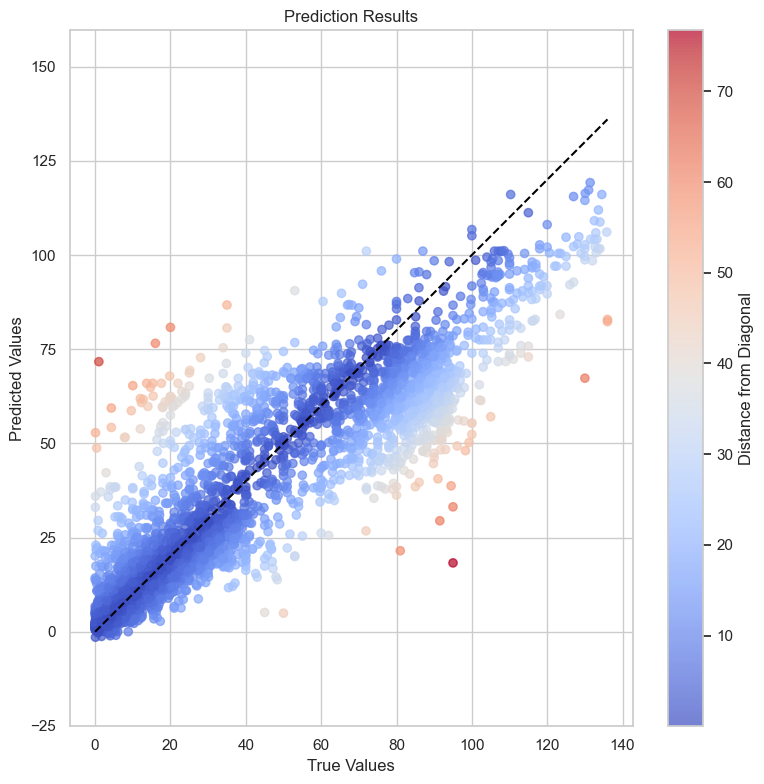

In [21]:
result_df['distance'] = np.abs(result_df['y_test_unsc'] - result_df['y_pred_unsc'])


plt.figure(figsize=(8, 8))
plt.scatter(result_df['y_test_unsc'], result_df['y_pred_unsc'], c=result_df['distance'], cmap='coolwarm', alpha=0.7)
plt.plot([min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         [min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         color='black', linestyle='--')
plt.colorbar(label='Distance from Diagonal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Results')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [58]:
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1812634	total: 21.8ms	remaining: 21.8s
1:	learn: 0.1774360	total: 43.1ms	remaining: 21.5s
2:	learn: 0.1737541	total: 66.5ms	remaining: 22.1s
3:	learn: 0.1700627	total: 91.3ms	remaining: 22.7s
4:	learn: 0.1665285	total: 115ms	remaining: 22.9s
5:	learn: 0.1630715	total: 143ms	remaining: 23.7s
6:	learn: 0.1598747	total: 162ms	remaining: 23s
7:	learn: 0.1567421	total: 187ms	remaining: 23.2s
8:	learn: 0.1535899	total: 212ms	remaining: 23.4s
9:	learn: 0.1506064	total: 237ms	remaining: 23.4s
10:	learn: 0.1476850	total: 258ms	remaining: 23.2s
11:	learn: 0.1446973	total: 287ms	remaining: 23.6s
12:	learn: 0.1418788	total: 314ms	remaining: 23.8s
13:	learn: 0.1392343	total: 336ms	remaining: 23.7s
14:	learn: 0.1366437	total: 362ms	remaining: 23.8s
15:	learn: 0.1340895	total: 391ms	remaining: 24.1s
16:	learn: 0.1316795	total: 418ms	remaining: 24.1s
17:	learn: 0.1292018	total: 445ms	remaining: 24.3s
18:	learn: 0.1267684	total: 471ms	remaining: 24.3s
19:	learn: 0.1245769	total: 494ms	remai

165:	learn: 0.0455612	total: 4.43s	remaining: 22.3s
166:	learn: 0.0454772	total: 4.46s	remaining: 22.3s
167:	learn: 0.0453974	total: 4.49s	remaining: 22.2s
168:	learn: 0.0453410	total: 4.51s	remaining: 22.2s
169:	learn: 0.0452572	total: 4.54s	remaining: 22.1s
170:	learn: 0.0451848	total: 4.56s	remaining: 22.1s
171:	learn: 0.0450891	total: 4.59s	remaining: 22.1s
172:	learn: 0.0449832	total: 4.62s	remaining: 22.1s
173:	learn: 0.0448939	total: 4.64s	remaining: 22s
174:	learn: 0.0448011	total: 4.67s	remaining: 22s
175:	learn: 0.0446946	total: 4.71s	remaining: 22s
176:	learn: 0.0446483	total: 4.73s	remaining: 22s
177:	learn: 0.0445557	total: 4.76s	remaining: 22s
178:	learn: 0.0444677	total: 4.79s	remaining: 21.9s
179:	learn: 0.0443815	total: 4.82s	remaining: 21.9s
180:	learn: 0.0443270	total: 4.84s	remaining: 21.9s
181:	learn: 0.0442819	total: 4.86s	remaining: 21.9s
182:	learn: 0.0441754	total: 4.89s	remaining: 21.8s
183:	learn: 0.0440810	total: 4.92s	remaining: 21.8s
184:	learn: 0.0440055	

327:	learn: 0.0373927	total: 8.35s	remaining: 17.1s
328:	learn: 0.0373701	total: 8.37s	remaining: 17.1s
329:	learn: 0.0373289	total: 8.39s	remaining: 17s
330:	learn: 0.0372869	total: 8.41s	remaining: 17s
331:	learn: 0.0372594	total: 8.43s	remaining: 17s
332:	learn: 0.0372304	total: 8.45s	remaining: 16.9s
333:	learn: 0.0371895	total: 8.47s	remaining: 16.9s
334:	learn: 0.0371659	total: 8.49s	remaining: 16.9s
335:	learn: 0.0371231	total: 8.52s	remaining: 16.8s
336:	learn: 0.0370960	total: 8.54s	remaining: 16.8s
337:	learn: 0.0370662	total: 8.56s	remaining: 16.8s
338:	learn: 0.0370252	total: 8.59s	remaining: 16.7s
339:	learn: 0.0369797	total: 8.61s	remaining: 16.7s
340:	learn: 0.0369664	total: 8.63s	remaining: 16.7s
341:	learn: 0.0369525	total: 8.65s	remaining: 16.6s
342:	learn: 0.0369352	total: 8.66s	remaining: 16.6s
343:	learn: 0.0368950	total: 8.68s	remaining: 16.6s
344:	learn: 0.0368774	total: 8.71s	remaining: 16.5s
345:	learn: 0.0368350	total: 8.73s	remaining: 16.5s
346:	learn: 0.0368

488:	learn: 0.0327326	total: 11.4s	remaining: 11.9s
489:	learn: 0.0327177	total: 11.4s	remaining: 11.9s
490:	learn: 0.0326889	total: 11.5s	remaining: 11.9s
491:	learn: 0.0326805	total: 11.5s	remaining: 11.8s
492:	learn: 0.0326407	total: 11.5s	remaining: 11.8s
493:	learn: 0.0326337	total: 11.5s	remaining: 11.8s
494:	learn: 0.0325995	total: 11.5s	remaining: 11.8s
495:	learn: 0.0325709	total: 11.5s	remaining: 11.7s
496:	learn: 0.0325382	total: 11.6s	remaining: 11.7s
497:	learn: 0.0325251	total: 11.6s	remaining: 11.7s
498:	learn: 0.0325102	total: 11.6s	remaining: 11.6s
499:	learn: 0.0325046	total: 11.6s	remaining: 11.6s
500:	learn: 0.0324582	total: 11.6s	remaining: 11.6s
501:	learn: 0.0324417	total: 11.7s	remaining: 11.6s
502:	learn: 0.0324086	total: 11.7s	remaining: 11.5s
503:	learn: 0.0323916	total: 11.7s	remaining: 11.5s
504:	learn: 0.0323671	total: 11.7s	remaining: 11.5s
505:	learn: 0.0323486	total: 11.7s	remaining: 11.4s
506:	learn: 0.0323351	total: 11.7s	remaining: 11.4s
507:	learn: 

656:	learn: 0.0299521	total: 14.2s	remaining: 7.42s
657:	learn: 0.0299297	total: 14.2s	remaining: 7.39s
658:	learn: 0.0299215	total: 14.2s	remaining: 7.37s
659:	learn: 0.0299069	total: 14.3s	remaining: 7.34s
660:	learn: 0.0298953	total: 14.3s	remaining: 7.32s
661:	learn: 0.0298917	total: 14.3s	remaining: 7.29s
662:	learn: 0.0298777	total: 14.3s	remaining: 7.27s
663:	learn: 0.0298625	total: 14.3s	remaining: 7.24s
664:	learn: 0.0298500	total: 14.3s	remaining: 7.22s
665:	learn: 0.0298347	total: 14.3s	remaining: 7.2s
666:	learn: 0.0298255	total: 14.4s	remaining: 7.17s
667:	learn: 0.0298222	total: 14.4s	remaining: 7.15s
668:	learn: 0.0298136	total: 14.4s	remaining: 7.12s
669:	learn: 0.0298062	total: 14.4s	remaining: 7.1s
670:	learn: 0.0298015	total: 14.4s	remaining: 7.07s
671:	learn: 0.0297812	total: 14.4s	remaining: 7.05s
672:	learn: 0.0297724	total: 14.5s	remaining: 7.02s
673:	learn: 0.0297664	total: 14.5s	remaining: 7s
674:	learn: 0.0297447	total: 14.5s	remaining: 6.98s
675:	learn: 0.029

821:	learn: 0.0281755	total: 16.8s	remaining: 3.63s
822:	learn: 0.0281680	total: 16.8s	remaining: 3.61s
823:	learn: 0.0281632	total: 16.8s	remaining: 3.59s
824:	learn: 0.0281429	total: 16.8s	remaining: 3.57s
825:	learn: 0.0281242	total: 16.9s	remaining: 3.55s
826:	learn: 0.0281179	total: 16.9s	remaining: 3.53s
827:	learn: 0.0280995	total: 16.9s	remaining: 3.51s
828:	learn: 0.0280941	total: 16.9s	remaining: 3.49s
829:	learn: 0.0280896	total: 16.9s	remaining: 3.46s
830:	learn: 0.0280733	total: 16.9s	remaining: 3.44s
831:	learn: 0.0280694	total: 16.9s	remaining: 3.42s
832:	learn: 0.0280612	total: 17s	remaining: 3.4s
833:	learn: 0.0280590	total: 17s	remaining: 3.38s
834:	learn: 0.0280540	total: 17s	remaining: 3.36s
835:	learn: 0.0280434	total: 17s	remaining: 3.34s
836:	learn: 0.0280258	total: 17s	remaining: 3.31s
837:	learn: 0.0280207	total: 17s	remaining: 3.29s
838:	learn: 0.0280110	total: 17.1s	remaining: 3.27s
839:	learn: 0.0279997	total: 17.1s	remaining: 3.25s
840:	learn: 0.0279926	tot

988:	learn: 0.0269049	total: 19.4s	remaining: 215ms
989:	learn: 0.0269011	total: 19.4s	remaining: 196ms
990:	learn: 0.0268915	total: 19.4s	remaining: 176ms
991:	learn: 0.0268884	total: 19.4s	remaining: 157ms
992:	learn: 0.0268847	total: 19.4s	remaining: 137ms
993:	learn: 0.0268764	total: 19.4s	remaining: 117ms
994:	learn: 0.0268705	total: 19.5s	remaining: 97.8ms
995:	learn: 0.0268670	total: 19.5s	remaining: 78.2ms
996:	learn: 0.0268568	total: 19.5s	remaining: 58.6ms
997:	learn: 0.0268519	total: 19.5s	remaining: 39.1ms
998:	learn: 0.0268438	total: 19.5s	remaining: 19.5ms
999:	learn: 0.0268430	total: 19.5s	remaining: 0us
Best hyperparameters: OrderedDict([('bagging_temperature', 0.8725730682571816), ('border_count', 61), ('depth', 10), ('grow_policy', 'Depthwise'), ('l2_leaf_reg', 1.0), ('learning_rate', 0.027048120033126642), ('min_data_in_leaf', 6)])
Best MSE score: 0.002566630844764727


In [59]:
best_hyperparameters = {
    'bagging_temperature': 0.8725730682571816,
    'border_count':61,
    'depth': 10,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 1.0,
    'learning_rate': 0.027048120033126642,
    'min_data_in_leaf': 6
}


model_3_tun_3 = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun_3.fit(X_train_sc, y_train_sc)


y_pred_3_tun_3 = model_3_tun_3.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)


0:	learn: 0.1812634	total: 24.9ms	remaining: 24.8s
1:	learn: 0.1774360	total: 47.2ms	remaining: 23.5s
2:	learn: 0.1737541	total: 68.2ms	remaining: 22.7s
3:	learn: 0.1700627	total: 91.4ms	remaining: 22.8s
4:	learn: 0.1665285	total: 113ms	remaining: 22.5s
5:	learn: 0.1630715	total: 138ms	remaining: 22.8s
6:	learn: 0.1598747	total: 155ms	remaining: 22s
7:	learn: 0.1567421	total: 177ms	remaining: 21.9s
8:	learn: 0.1535899	total: 200ms	remaining: 22s
9:	learn: 0.1506064	total: 221ms	remaining: 21.9s
10:	learn: 0.1476850	total: 242ms	remaining: 21.8s
11:	learn: 0.1446973	total: 269ms	remaining: 22.2s
12:	learn: 0.1418788	total: 295ms	remaining: 22.4s
13:	learn: 0.1392343	total: 314ms	remaining: 22.1s
14:	learn: 0.1366437	total: 337ms	remaining: 22.1s
15:	learn: 0.1340895	total: 363ms	remaining: 22.3s
16:	learn: 0.1316795	total: 386ms	remaining: 22.3s
17:	learn: 0.1292018	total: 411ms	remaining: 22.4s
18:	learn: 0.1267684	total: 434ms	remaining: 22.4s
19:	learn: 0.1245769	total: 457ms	remaini

164:	learn: 0.0456679	total: 4.2s	remaining: 21.3s
165:	learn: 0.0455612	total: 4.23s	remaining: 21.2s
166:	learn: 0.0454772	total: 4.25s	remaining: 21.2s
167:	learn: 0.0453974	total: 4.28s	remaining: 21.2s
168:	learn: 0.0453410	total: 4.3s	remaining: 21.1s
169:	learn: 0.0452572	total: 4.32s	remaining: 21.1s
170:	learn: 0.0451848	total: 4.34s	remaining: 21s
171:	learn: 0.0450891	total: 4.37s	remaining: 21s
172:	learn: 0.0449832	total: 4.39s	remaining: 21s
173:	learn: 0.0448939	total: 4.42s	remaining: 21s
174:	learn: 0.0448011	total: 4.44s	remaining: 20.9s
175:	learn: 0.0446946	total: 4.47s	remaining: 20.9s
176:	learn: 0.0446483	total: 4.49s	remaining: 20.9s
177:	learn: 0.0445557	total: 4.51s	remaining: 20.8s
178:	learn: 0.0444677	total: 4.54s	remaining: 20.8s
179:	learn: 0.0443815	total: 4.56s	remaining: 20.8s
180:	learn: 0.0443270	total: 4.58s	remaining: 20.7s
181:	learn: 0.0442819	total: 4.6s	remaining: 20.7s
182:	learn: 0.0441754	total: 4.63s	remaining: 20.7s
183:	learn: 0.0440810	t

328:	learn: 0.0373701	total: 7.9s	remaining: 16.1s
329:	learn: 0.0373289	total: 7.92s	remaining: 16.1s
330:	learn: 0.0372869	total: 7.94s	remaining: 16.1s
331:	learn: 0.0372594	total: 7.96s	remaining: 16s
332:	learn: 0.0372304	total: 7.98s	remaining: 16s
333:	learn: 0.0371895	total: 8s	remaining: 16s
334:	learn: 0.0371659	total: 8.02s	remaining: 15.9s
335:	learn: 0.0371231	total: 8.05s	remaining: 15.9s
336:	learn: 0.0370960	total: 8.06s	remaining: 15.9s
337:	learn: 0.0370662	total: 8.09s	remaining: 15.8s
338:	learn: 0.0370252	total: 8.11s	remaining: 15.8s
339:	learn: 0.0369797	total: 8.14s	remaining: 15.8s
340:	learn: 0.0369664	total: 8.15s	remaining: 15.8s
341:	learn: 0.0369525	total: 8.17s	remaining: 15.7s
342:	learn: 0.0369352	total: 8.19s	remaining: 15.7s
343:	learn: 0.0368950	total: 8.21s	remaining: 15.7s
344:	learn: 0.0368774	total: 8.23s	remaining: 15.6s
345:	learn: 0.0368350	total: 8.26s	remaining: 15.6s
346:	learn: 0.0368046	total: 8.27s	remaining: 15.6s
347:	learn: 0.0367822	

494:	learn: 0.0325995	total: 10.9s	remaining: 11.1s
495:	learn: 0.0325709	total: 10.9s	remaining: 11.1s
496:	learn: 0.0325382	total: 11s	remaining: 11.1s
497:	learn: 0.0325251	total: 11s	remaining: 11.1s
498:	learn: 0.0325102	total: 11s	remaining: 11s
499:	learn: 0.0325046	total: 11s	remaining: 11s
500:	learn: 0.0324582	total: 11s	remaining: 11s
501:	learn: 0.0324417	total: 11s	remaining: 10.9s
502:	learn: 0.0324086	total: 11.1s	remaining: 10.9s
503:	learn: 0.0323916	total: 11.1s	remaining: 10.9s
504:	learn: 0.0323671	total: 11.1s	remaining: 10.9s
505:	learn: 0.0323486	total: 11.1s	remaining: 10.8s
506:	learn: 0.0323351	total: 11.1s	remaining: 10.8s
507:	learn: 0.0323179	total: 11.1s	remaining: 10.8s
508:	learn: 0.0323076	total: 11.1s	remaining: 10.8s
509:	learn: 0.0322915	total: 11.2s	remaining: 10.7s
510:	learn: 0.0322715	total: 11.2s	remaining: 10.7s
511:	learn: 0.0322458	total: 11.2s	remaining: 10.7s
512:	learn: 0.0322303	total: 11.2s	remaining: 10.7s
513:	learn: 0.0322199	total: 1

663:	learn: 0.0298625	total: 13.5s	remaining: 6.84s
664:	learn: 0.0298500	total: 13.5s	remaining: 6.82s
665:	learn: 0.0298347	total: 13.6s	remaining: 6.8s
666:	learn: 0.0298255	total: 13.6s	remaining: 6.78s
667:	learn: 0.0298222	total: 13.6s	remaining: 6.75s
668:	learn: 0.0298136	total: 13.6s	remaining: 6.73s
669:	learn: 0.0298062	total: 13.6s	remaining: 6.71s
670:	learn: 0.0298015	total: 13.6s	remaining: 6.68s
671:	learn: 0.0297812	total: 13.6s	remaining: 6.66s
672:	learn: 0.0297724	total: 13.7s	remaining: 6.64s
673:	learn: 0.0297664	total: 13.7s	remaining: 6.61s
674:	learn: 0.0297447	total: 13.7s	remaining: 6.59s
675:	learn: 0.0297352	total: 13.7s	remaining: 6.57s
676:	learn: 0.0297239	total: 13.7s	remaining: 6.54s
677:	learn: 0.0297132	total: 13.7s	remaining: 6.52s
678:	learn: 0.0296974	total: 13.8s	remaining: 6.5s
679:	learn: 0.0296808	total: 13.8s	remaining: 6.48s
680:	learn: 0.0296643	total: 13.8s	remaining: 6.46s
681:	learn: 0.0296542	total: 13.8s	remaining: 6.44s
682:	learn: 0.

822:	learn: 0.0281680	total: 15.9s	remaining: 3.42s
823:	learn: 0.0281632	total: 15.9s	remaining: 3.39s
824:	learn: 0.0281429	total: 15.9s	remaining: 3.37s
825:	learn: 0.0281242	total: 15.9s	remaining: 3.36s
826:	learn: 0.0281179	total: 15.9s	remaining: 3.33s
827:	learn: 0.0280995	total: 16s	remaining: 3.32s
828:	learn: 0.0280941	total: 16s	remaining: 3.29s
829:	learn: 0.0280896	total: 16s	remaining: 3.27s
830:	learn: 0.0280733	total: 16s	remaining: 3.25s
831:	learn: 0.0280694	total: 16s	remaining: 3.23s
832:	learn: 0.0280612	total: 16s	remaining: 3.21s
833:	learn: 0.0280590	total: 16s	remaining: 3.19s
834:	learn: 0.0280540	total: 16.1s	remaining: 3.17s
835:	learn: 0.0280434	total: 16.1s	remaining: 3.15s
836:	learn: 0.0280258	total: 16.1s	remaining: 3.13s
837:	learn: 0.0280207	total: 16.1s	remaining: 3.11s
838:	learn: 0.0280110	total: 16.1s	remaining: 3.09s
839:	learn: 0.0279997	total: 16.1s	remaining: 3.07s
840:	learn: 0.0279926	total: 16.2s	remaining: 3.05s
841:	learn: 0.0279871	tota

981:	learn: 0.0269623	total: 18.2s	remaining: 334ms
982:	learn: 0.0269563	total: 18.3s	remaining: 316ms
983:	learn: 0.0269483	total: 18.3s	remaining: 297ms
984:	learn: 0.0269468	total: 18.3s	remaining: 278ms
985:	learn: 0.0269366	total: 18.3s	remaining: 260ms
986:	learn: 0.0269303	total: 18.3s	remaining: 241ms
987:	learn: 0.0269163	total: 18.3s	remaining: 223ms
988:	learn: 0.0269049	total: 18.3s	remaining: 204ms
989:	learn: 0.0269011	total: 18.4s	remaining: 185ms
990:	learn: 0.0268915	total: 18.4s	remaining: 167ms
991:	learn: 0.0268884	total: 18.4s	remaining: 148ms
992:	learn: 0.0268847	total: 18.4s	remaining: 130ms
993:	learn: 0.0268764	total: 18.4s	remaining: 111ms
994:	learn: 0.0268705	total: 18.4s	remaining: 92.7ms
995:	learn: 0.0268670	total: 18.4s	remaining: 74.1ms
996:	learn: 0.0268568	total: 18.5s	remaining: 55.6ms
997:	learn: 0.0268519	total: 18.5s	remaining: 37ms
998:	learn: 0.0268438	total: 18.5s	remaining: 18.5ms
999:	learn: 0.0268430	total: 18.5s	remaining: 0us
Mean Square

In [60]:
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=200,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1798505	total: 16.5ms	remaining: 16.5s
1:	learn: 0.1746599	total: 37.1ms	remaining: 18.5s
2:	learn: 0.1695946	total: 59.3ms	remaining: 19.7s
3:	learn: 0.1647656	total: 77.6ms	remaining: 19.3s
4:	learn: 0.1601760	total: 96.3ms	remaining: 19.2s
5:	learn: 0.1556797	total: 116ms	remaining: 19.2s
6:	learn: 0.1512846	total: 132ms	remaining: 18.7s
7:	learn: 0.1473599	total: 149ms	remaining: 18.5s
8:	learn: 0.1434072	total: 169ms	remaining: 18.7s
9:	learn: 0.1396800	total: 188ms	remaining: 18.7s
10:	learn: 0.1359743	total: 209ms	remaining: 18.8s
11:	learn: 0.1324243	total: 227ms	remaining: 18.7s
12:	learn: 0.1290884	total: 247ms	remaining: 18.7s
13:	learn: 0.1259035	total: 266ms	remaining: 18.7s
14:	learn: 0.1229097	total: 281ms	remaining: 18.5s
15:	learn: 0.1200384	total: 297ms	remaining: 18.3s
16:	learn: 0.1172692	total: 316ms	remaining: 18.3s
17:	learn: 0.1146368	total: 334ms	remaining: 18.2s
18:	learn: 0.1120831	total: 354ms	remaining: 18.3s
19:	learn: 0.1096132	total: 372ms	re

165:	learn: 0.0433973	total: 3.02s	remaining: 15.2s
166:	learn: 0.0433676	total: 3.04s	remaining: 15.2s
167:	learn: 0.0432867	total: 3.05s	remaining: 15.1s
168:	learn: 0.0432115	total: 3.06s	remaining: 15.1s
169:	learn: 0.0431306	total: 3.08s	remaining: 15.1s
170:	learn: 0.0430820	total: 3.1s	remaining: 15s
171:	learn: 0.0430366	total: 3.11s	remaining: 15s
172:	learn: 0.0429718	total: 3.12s	remaining: 14.9s
173:	learn: 0.0429145	total: 3.14s	remaining: 14.9s
174:	learn: 0.0428788	total: 3.15s	remaining: 14.9s
175:	learn: 0.0428408	total: 3.16s	remaining: 14.8s
176:	learn: 0.0427403	total: 3.18s	remaining: 14.8s
177:	learn: 0.0426973	total: 3.2s	remaining: 14.8s
178:	learn: 0.0426691	total: 3.21s	remaining: 14.7s
179:	learn: 0.0425731	total: 3.23s	remaining: 14.7s
180:	learn: 0.0425036	total: 3.24s	remaining: 14.7s
181:	learn: 0.0424577	total: 3.25s	remaining: 14.6s
182:	learn: 0.0424027	total: 3.27s	remaining: 14.6s
183:	learn: 0.0423426	total: 3.28s	remaining: 14.6s
184:	learn: 0.0422

338:	learn: 0.0355011	total: 5.18s	remaining: 10.1s
339:	learn: 0.0354861	total: 5.19s	remaining: 10.1s
340:	learn: 0.0354588	total: 5.2s	remaining: 10.1s
341:	learn: 0.0354254	total: 5.21s	remaining: 10s
342:	learn: 0.0354083	total: 5.22s	remaining: 10s
343:	learn: 0.0353887	total: 5.23s	remaining: 9.97s
344:	learn: 0.0353377	total: 5.24s	remaining: 9.95s
345:	learn: 0.0352935	total: 5.25s	remaining: 9.93s
346:	learn: 0.0352488	total: 5.26s	remaining: 9.91s
347:	learn: 0.0352354	total: 5.27s	remaining: 9.88s
348:	learn: 0.0352252	total: 5.28s	remaining: 9.85s
349:	learn: 0.0351825	total: 5.29s	remaining: 9.83s
350:	learn: 0.0351730	total: 5.31s	remaining: 9.81s
351:	learn: 0.0351400	total: 5.32s	remaining: 9.79s
352:	learn: 0.0351102	total: 5.33s	remaining: 9.77s
353:	learn: 0.0350765	total: 5.34s	remaining: 9.74s
354:	learn: 0.0350425	total: 5.35s	remaining: 9.72s
355:	learn: 0.0350075	total: 5.36s	remaining: 9.7s
356:	learn: 0.0349821	total: 5.37s	remaining: 9.68s
357:	learn: 0.0349

497:	learn: 0.0320402	total: 6.69s	remaining: 6.74s
498:	learn: 0.0320280	total: 6.7s	remaining: 6.72s
499:	learn: 0.0319982	total: 6.71s	remaining: 6.71s
500:	learn: 0.0319807	total: 6.72s	remaining: 6.69s
501:	learn: 0.0319710	total: 6.72s	remaining: 6.67s
502:	learn: 0.0319670	total: 6.73s	remaining: 6.65s
503:	learn: 0.0319477	total: 6.74s	remaining: 6.64s
504:	learn: 0.0319380	total: 6.75s	remaining: 6.62s
505:	learn: 0.0319303	total: 6.76s	remaining: 6.6s
506:	learn: 0.0319077	total: 6.77s	remaining: 6.58s
507:	learn: 0.0318974	total: 6.78s	remaining: 6.56s
508:	learn: 0.0318902	total: 6.79s	remaining: 6.54s
509:	learn: 0.0318738	total: 6.8s	remaining: 6.53s
510:	learn: 0.0318437	total: 6.81s	remaining: 6.51s
511:	learn: 0.0318288	total: 6.82s	remaining: 6.5s
512:	learn: 0.0318026	total: 6.83s	remaining: 6.48s
513:	learn: 0.0317900	total: 6.83s	remaining: 6.46s
514:	learn: 0.0317709	total: 6.84s	remaining: 6.45s
515:	learn: 0.0317642	total: 6.85s	remaining: 6.43s
516:	learn: 0.03

658:	learn: 0.0298729	total: 8.18s	remaining: 4.23s
659:	learn: 0.0298643	total: 8.19s	remaining: 4.22s
660:	learn: 0.0298549	total: 8.19s	remaining: 4.2s
661:	learn: 0.0298500	total: 8.2s	remaining: 4.19s
662:	learn: 0.0298376	total: 8.21s	remaining: 4.17s
663:	learn: 0.0298228	total: 8.22s	remaining: 4.16s
664:	learn: 0.0298025	total: 8.23s	remaining: 4.14s
665:	learn: 0.0297952	total: 8.24s	remaining: 4.13s
666:	learn: 0.0297909	total: 8.25s	remaining: 4.12s
667:	learn: 0.0297780	total: 8.26s	remaining: 4.1s
668:	learn: 0.0297750	total: 8.26s	remaining: 4.09s
669:	learn: 0.0297707	total: 8.27s	remaining: 4.07s
670:	learn: 0.0297667	total: 8.28s	remaining: 4.06s
671:	learn: 0.0297609	total: 8.29s	remaining: 4.04s
672:	learn: 0.0297434	total: 8.3s	remaining: 4.03s
673:	learn: 0.0297383	total: 8.31s	remaining: 4.02s
674:	learn: 0.0297166	total: 8.32s	remaining: 4.01s
675:	learn: 0.0296943	total: 8.33s	remaining: 3.99s
676:	learn: 0.0296874	total: 8.34s	remaining: 3.98s
677:	learn: 0.02

823:	learn: 0.0284280	total: 9.68s	remaining: 2.07s
824:	learn: 0.0284128	total: 9.69s	remaining: 2.06s
825:	learn: 0.0284074	total: 9.7s	remaining: 2.04s
826:	learn: 0.0284030	total: 9.71s	remaining: 2.03s
827:	learn: 0.0283966	total: 9.71s	remaining: 2.02s
828:	learn: 0.0283911	total: 9.72s	remaining: 2s
829:	learn: 0.0283893	total: 9.73s	remaining: 1.99s
830:	learn: 0.0283849	total: 9.74s	remaining: 1.98s
831:	learn: 0.0283630	total: 9.76s	remaining: 1.97s
832:	learn: 0.0283530	total: 9.76s	remaining: 1.96s
833:	learn: 0.0283413	total: 9.78s	remaining: 1.95s
834:	learn: 0.0283367	total: 9.79s	remaining: 1.93s
835:	learn: 0.0283306	total: 9.79s	remaining: 1.92s
836:	learn: 0.0283279	total: 9.8s	remaining: 1.91s
837:	learn: 0.0283214	total: 9.81s	remaining: 1.9s
838:	learn: 0.0283172	total: 9.82s	remaining: 1.88s
839:	learn: 0.0283096	total: 9.83s	remaining: 1.87s
840:	learn: 0.0283076	total: 9.84s	remaining: 1.86s
841:	learn: 0.0283035	total: 9.85s	remaining: 1.85s
842:	learn: 0.0282

983:	learn: 0.0273943	total: 11.2s	remaining: 181ms
984:	learn: 0.0273910	total: 11.2s	remaining: 170ms
985:	learn: 0.0273880	total: 11.2s	remaining: 159ms
986:	learn: 0.0273778	total: 11.2s	remaining: 147ms
987:	learn: 0.0273720	total: 11.2s	remaining: 136ms
988:	learn: 0.0273689	total: 11.2s	remaining: 125ms
989:	learn: 0.0273681	total: 11.2s	remaining: 113ms
990:	learn: 0.0273567	total: 11.2s	remaining: 102ms
991:	learn: 0.0273536	total: 11.2s	remaining: 90.5ms
992:	learn: 0.0273462	total: 11.2s	remaining: 79.2ms
993:	learn: 0.0273393	total: 11.2s	remaining: 67.8ms
994:	learn: 0.0273386	total: 11.2s	remaining: 56.5ms
995:	learn: 0.0273335	total: 11.3s	remaining: 45.2ms
996:	learn: 0.0273270	total: 11.3s	remaining: 33.9ms
997:	learn: 0.0273241	total: 11.3s	remaining: 22.6ms
998:	learn: 0.0273144	total: 11.3s	remaining: 11.3ms
999:	learn: 0.0273092	total: 11.3s	remaining: 0us
Best hyperparameters: OrderedDict([('bagging_temperature', 0.304394201848315), ('border_count', 74), ('depth',

In [22]:
best_hyperparameters = {
    'bagging_temperature': 0.304394201848315,
    'border_count':74,
    'depth': 10,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 1.0,
    'learning_rate': 0.037761777174258264,
    'min_data_in_leaf': 38
}


model_3_tun_4 = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun_4.fit(X_train_sc, y_train_sc)


y_pred_3_tun_4 = model_3_tun_4.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_4)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_4)
r2 = r2_score(y_test_sc, y_pred_3_tun_4)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_4)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1798505	total: 23.8ms	remaining: 23.8s
1:	learn: 0.1746599	total: 50.4ms	remaining: 25.2s
2:	learn: 0.1695946	total: 78.4ms	remaining: 26.1s
3:	learn: 0.1647656	total: 105ms	remaining: 26.2s
4:	learn: 0.1601760	total: 132ms	remaining: 26.2s
5:	learn: 0.1556797	total: 161ms	remaining: 26.7s
6:	learn: 0.1512846	total: 186ms	remaining: 26.4s
7:	learn: 0.1473599	total: 212ms	remaining: 26.3s
8:	learn: 0.1434072	total: 242ms	remaining: 26.7s
9:	learn: 0.1396800	total: 273ms	remaining: 27s
10:	learn: 0.1359743	total: 305ms	remaining: 27.4s
11:	learn: 0.1324243	total: 333ms	remaining: 27.4s
12:	learn: 0.1290884	total: 368ms	remaining: 27.9s
13:	learn: 0.1259035	total: 399ms	remaining: 28.1s
14:	learn: 0.1229097	total: 422ms	remaining: 27.7s
15:	learn: 0.1200384	total: 448ms	remaining: 27.6s
16:	learn: 0.1172692	total: 479ms	remaining: 27.7s
17:	learn: 0.1146368	total: 507ms	remaining: 27.7s
18:	learn: 0.1120831	total: 538ms	remaining: 27.8s
19:	learn: 0.1096132	total: 563ms	remain

165:	learn: 0.0433973	total: 4.47s	remaining: 22.4s
166:	learn: 0.0433676	total: 4.49s	remaining: 22.4s
167:	learn: 0.0432867	total: 4.51s	remaining: 22.3s
168:	learn: 0.0432115	total: 4.53s	remaining: 22.3s
169:	learn: 0.0431306	total: 4.56s	remaining: 22.3s
170:	learn: 0.0430820	total: 4.58s	remaining: 22.2s
171:	learn: 0.0430366	total: 4.59s	remaining: 22.1s
172:	learn: 0.0429718	total: 4.62s	remaining: 22.1s
173:	learn: 0.0429145	total: 4.64s	remaining: 22s
174:	learn: 0.0428788	total: 4.66s	remaining: 21.9s
175:	learn: 0.0428408	total: 4.67s	remaining: 21.9s
176:	learn: 0.0427403	total: 4.7s	remaining: 21.9s
177:	learn: 0.0426973	total: 4.73s	remaining: 21.8s
178:	learn: 0.0426691	total: 4.75s	remaining: 21.8s
179:	learn: 0.0425731	total: 4.77s	remaining: 21.7s
180:	learn: 0.0425036	total: 4.79s	remaining: 21.7s
181:	learn: 0.0424577	total: 4.8s	remaining: 21.6s
182:	learn: 0.0424027	total: 4.82s	remaining: 21.5s
183:	learn: 0.0423426	total: 4.85s	remaining: 21.5s
184:	learn: 0.04

324:	learn: 0.0360110	total: 7.49s	remaining: 15.5s
325:	learn: 0.0359990	total: 7.5s	remaining: 15.5s
326:	learn: 0.0359699	total: 7.52s	remaining: 15.5s
327:	learn: 0.0358935	total: 7.54s	remaining: 15.4s
328:	learn: 0.0358552	total: 7.55s	remaining: 15.4s
329:	learn: 0.0358222	total: 7.57s	remaining: 15.4s
330:	learn: 0.0357862	total: 7.58s	remaining: 15.3s
331:	learn: 0.0357597	total: 7.6s	remaining: 15.3s
332:	learn: 0.0357253	total: 7.61s	remaining: 15.2s
333:	learn: 0.0357003	total: 7.62s	remaining: 15.2s
334:	learn: 0.0356412	total: 7.64s	remaining: 15.2s
335:	learn: 0.0356007	total: 7.66s	remaining: 15.1s
336:	learn: 0.0355708	total: 7.67s	remaining: 15.1s
337:	learn: 0.0355515	total: 7.68s	remaining: 15s
338:	learn: 0.0355011	total: 7.7s	remaining: 15s
339:	learn: 0.0354861	total: 7.71s	remaining: 15s
340:	learn: 0.0354588	total: 7.73s	remaining: 14.9s
341:	learn: 0.0354254	total: 7.74s	remaining: 14.9s
342:	learn: 0.0354083	total: 7.75s	remaining: 14.8s
343:	learn: 0.0353887

494:	learn: 0.0321009	total: 9.85s	remaining: 10s
495:	learn: 0.0320756	total: 9.87s	remaining: 10s
496:	learn: 0.0320639	total: 9.88s	remaining: 10s
497:	learn: 0.0320402	total: 9.89s	remaining: 9.97s
498:	learn: 0.0320280	total: 9.91s	remaining: 9.95s
499:	learn: 0.0319982	total: 9.92s	remaining: 9.92s
500:	learn: 0.0319807	total: 9.94s	remaining: 9.9s
501:	learn: 0.0319710	total: 9.95s	remaining: 9.87s
502:	learn: 0.0319670	total: 9.96s	remaining: 9.84s
503:	learn: 0.0319477	total: 9.97s	remaining: 9.81s
504:	learn: 0.0319380	total: 9.98s	remaining: 9.79s
505:	learn: 0.0319303	total: 9.99s	remaining: 9.76s
506:	learn: 0.0319077	total: 10s	remaining: 9.73s
507:	learn: 0.0318974	total: 10s	remaining: 9.7s
508:	learn: 0.0318902	total: 10s	remaining: 9.68s
509:	learn: 0.0318738	total: 10s	remaining: 9.65s
510:	learn: 0.0318437	total: 10.1s	remaining: 9.63s
511:	learn: 0.0318288	total: 10.1s	remaining: 9.6s
512:	learn: 0.0318026	total: 10.1s	remaining: 9.58s
513:	learn: 0.0317900	total: 

655:	learn: 0.0299111	total: 12s	remaining: 6.3s
656:	learn: 0.0298928	total: 12s	remaining: 6.29s
657:	learn: 0.0298790	total: 12.1s	remaining: 6.27s
658:	learn: 0.0298729	total: 12.1s	remaining: 6.24s
659:	learn: 0.0298643	total: 12.1s	remaining: 6.22s
660:	learn: 0.0298549	total: 12.1s	remaining: 6.2s
661:	learn: 0.0298500	total: 12.1s	remaining: 6.18s
662:	learn: 0.0298376	total: 12.1s	remaining: 6.16s
663:	learn: 0.0298228	total: 12.1s	remaining: 6.14s
664:	learn: 0.0298025	total: 12.1s	remaining: 6.12s
665:	learn: 0.0297952	total: 12.2s	remaining: 6.09s
666:	learn: 0.0297909	total: 12.2s	remaining: 6.08s
667:	learn: 0.0297780	total: 12.2s	remaining: 6.05s
668:	learn: 0.0297750	total: 12.2s	remaining: 6.03s
669:	learn: 0.0297707	total: 12.2s	remaining: 6.01s
670:	learn: 0.0297667	total: 12.2s	remaining: 5.99s
671:	learn: 0.0297609	total: 12.2s	remaining: 5.97s
672:	learn: 0.0297434	total: 12.2s	remaining: 5.95s
673:	learn: 0.0297383	total: 12.3s	remaining: 5.93s
674:	learn: 0.0297

817:	learn: 0.0284681	total: 14.1s	remaining: 3.15s
818:	learn: 0.0284644	total: 14.2s	remaining: 3.13s
819:	learn: 0.0284600	total: 14.2s	remaining: 3.11s
820:	learn: 0.0284469	total: 14.2s	remaining: 3.09s
821:	learn: 0.0284452	total: 14.2s	remaining: 3.07s
822:	learn: 0.0284397	total: 14.2s	remaining: 3.05s
823:	learn: 0.0284280	total: 14.2s	remaining: 3.04s
824:	learn: 0.0284128	total: 14.2s	remaining: 3.02s
825:	learn: 0.0284074	total: 14.2s	remaining: 3s
826:	learn: 0.0284030	total: 14.3s	remaining: 2.98s
827:	learn: 0.0283966	total: 14.3s	remaining: 2.96s
828:	learn: 0.0283911	total: 14.3s	remaining: 2.95s
829:	learn: 0.0283893	total: 14.3s	remaining: 2.93s
830:	learn: 0.0283849	total: 14.3s	remaining: 2.91s
831:	learn: 0.0283630	total: 14.3s	remaining: 2.89s
832:	learn: 0.0283530	total: 14.3s	remaining: 2.88s
833:	learn: 0.0283413	total: 14.4s	remaining: 2.86s
834:	learn: 0.0283367	total: 14.4s	remaining: 2.84s
835:	learn: 0.0283306	total: 14.4s	remaining: 2.82s
836:	learn: 0.0

977:	learn: 0.0274195	total: 16.3s	remaining: 366ms
978:	learn: 0.0274177	total: 16.3s	remaining: 350ms
979:	learn: 0.0274146	total: 16.3s	remaining: 333ms
980:	learn: 0.0274136	total: 16.3s	remaining: 316ms
981:	learn: 0.0274079	total: 16.4s	remaining: 300ms
982:	learn: 0.0274007	total: 16.4s	remaining: 283ms
983:	learn: 0.0273943	total: 16.4s	remaining: 266ms
984:	learn: 0.0273910	total: 16.4s	remaining: 250ms
985:	learn: 0.0273880	total: 16.4s	remaining: 233ms
986:	learn: 0.0273778	total: 16.4s	remaining: 216ms
987:	learn: 0.0273720	total: 16.4s	remaining: 200ms
988:	learn: 0.0273689	total: 16.4s	remaining: 183ms
989:	learn: 0.0273681	total: 16.4s	remaining: 166ms
990:	learn: 0.0273567	total: 16.5s	remaining: 150ms
991:	learn: 0.0273536	total: 16.5s	remaining: 133ms
992:	learn: 0.0273462	total: 16.5s	remaining: 116ms
993:	learn: 0.0273393	total: 16.5s	remaining: 99.7ms
994:	learn: 0.0273386	total: 16.5s	remaining: 83ms
995:	learn: 0.0273335	total: 16.5s	remaining: 66.4ms
996:	learn:

# Results

In [25]:
data_new = {
    'Model': ['RandomForestRegressor', 'RandomForestRegressor', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'CatBoost', 'CatBoost', 'CatBoost', 'CatBoost', 'CatBoost'],
    'Tuning': ['Before Tuning', 'After Tuning', 'Before Tuning', 'After Tuning (200 iterations, 10 CV)', 'After Tuning (50 iterations, 5 CV)', 'After Hyperopt Tuning (100 iterations)', 'After Hyperopt Tuning (50 iterations)', 'After Hyperopt Tuning (50 iterations)', 'Before Tuning', 'After Tuning (50 iterations, 5 CV)', 'After Tuning (200 iterations, 10 CV)', 'After Hyperopt Tuning (100 iterations)', 'After Hyperopt Tuning (50 iterations)'],
    'MSE': [0.0065, 0.0077, 0.0062, 0.0086, 0.0090, 0.0060, 0.0100, 0.0065, 0.0064, 0.0074, 0.0074, 0.0060, 0.0099],
    'MAE': [0.0556, 0.0600, 0.0542, 0.0653, 0.0692, 0.0532, 0.0645, 0.0549, 0.0555, 0.0576, 0.0579, 0.0532, 0.0645],
    'R2': [0.8115, 0.7753, 0.8187, 0.7504, 0.7385, 0.8254, 0.8120, 0.8254, 0.8144, 0.8110, 0.7860, 0.7868, 0.7965],
    'MAPE': [9.33, 10.36, 7.38, 11.48, 10.29, 9.87, 9.16, 9.16, 8.80, 6.28, 6.49, 6.39, 5.71]
}

df = pd.DataFrame(data_new)

df


,Model,Tuning,MSE,MAE,R2,MAPE
0,RandomForestRegressor,Before Tuning,0.0065,0.0556,0.8115,9.33
1,RandomForestRegressor,After Tuning,0.0077,0.0600,0.7753,10.36
2,XGBoost,Before Tuning,0.0062,0.0542,0.8187,7.38
3,XGBoost,"After Tuning (200 iterations, 10 CV)",0.0086,0.0653,0.7504,11.48
4,XGBoost,"After Tuning (50 iterations, 5 CV)",0.0090,0.0692,0.7385,10.29
5,XGBoost,After Hyperopt Tuning (100 iterations),0.0060,0.0532,0.8254,9.87
6,XGBoost,After Hyperopt Tuning (50 iterations),0.0100,0.0645,0.8120,9.16
7,XGBoost,After Hyperopt Tuning (50 iterations),0.0065,0.0549,0.8254,9.16
8,CatBoost,Before Tuning,0.0064,0.0555,0.8144,8.80
9,CatBoost,"After Tuning (50 iterations, 5 CV)",0.0074,0.0576,0.8110,6.28


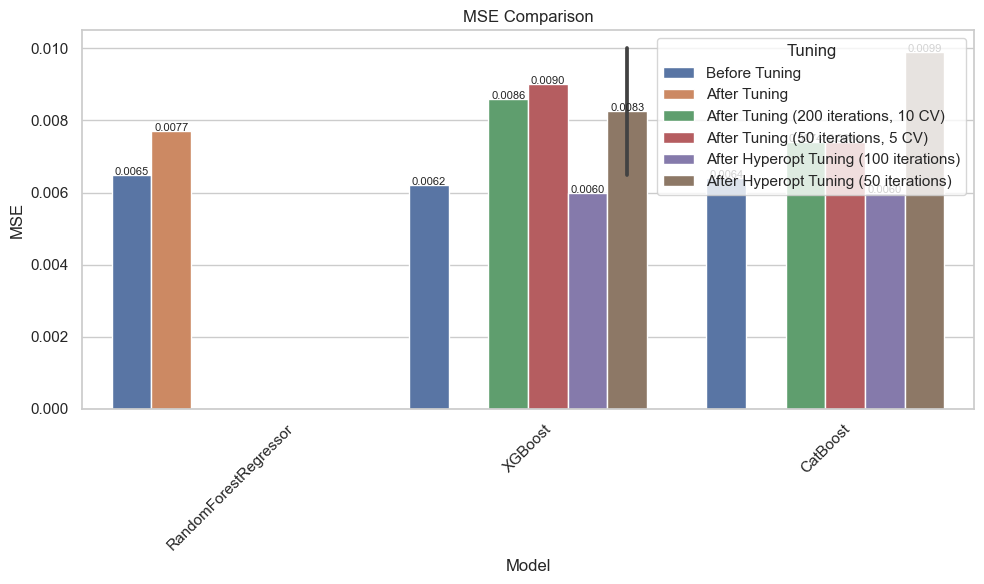

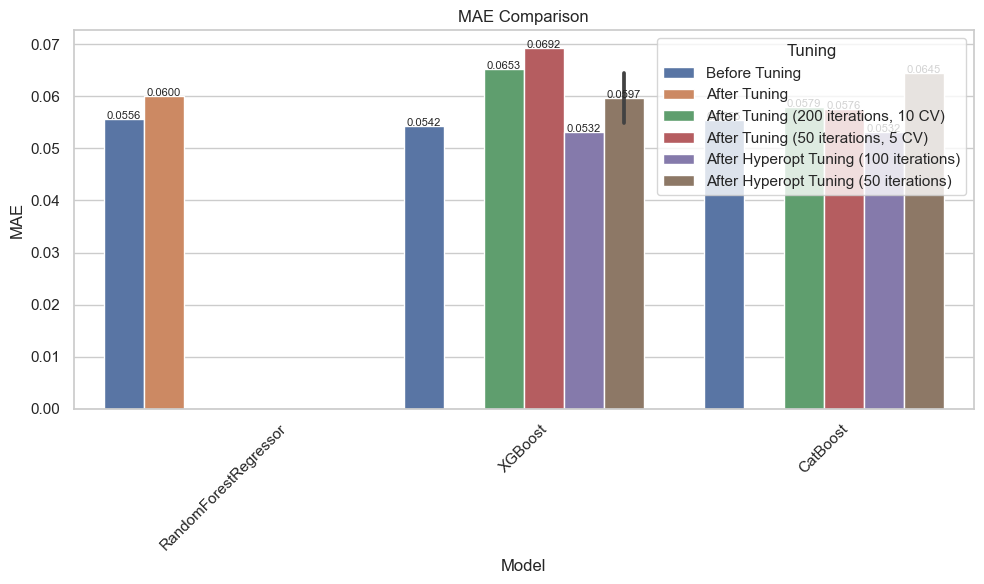

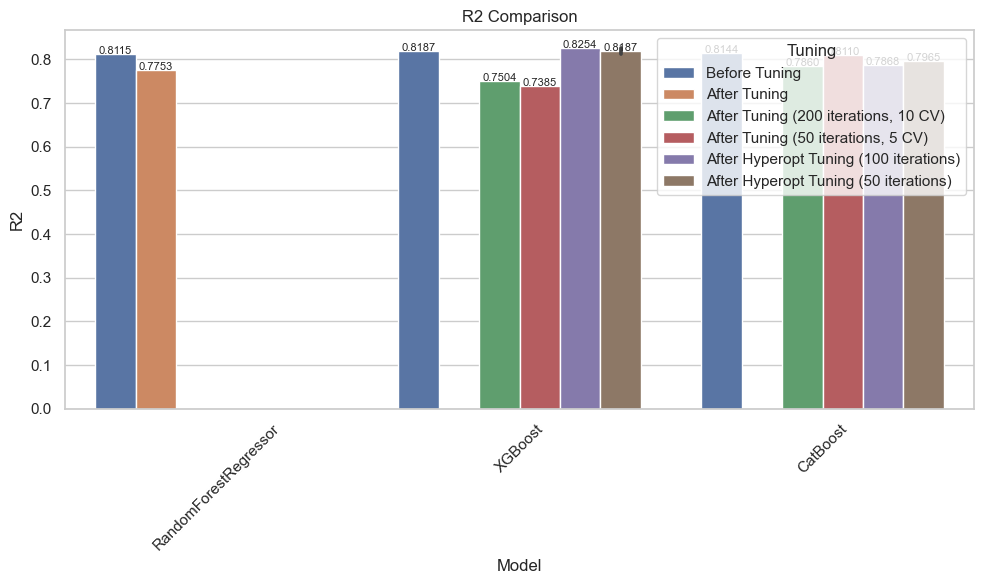

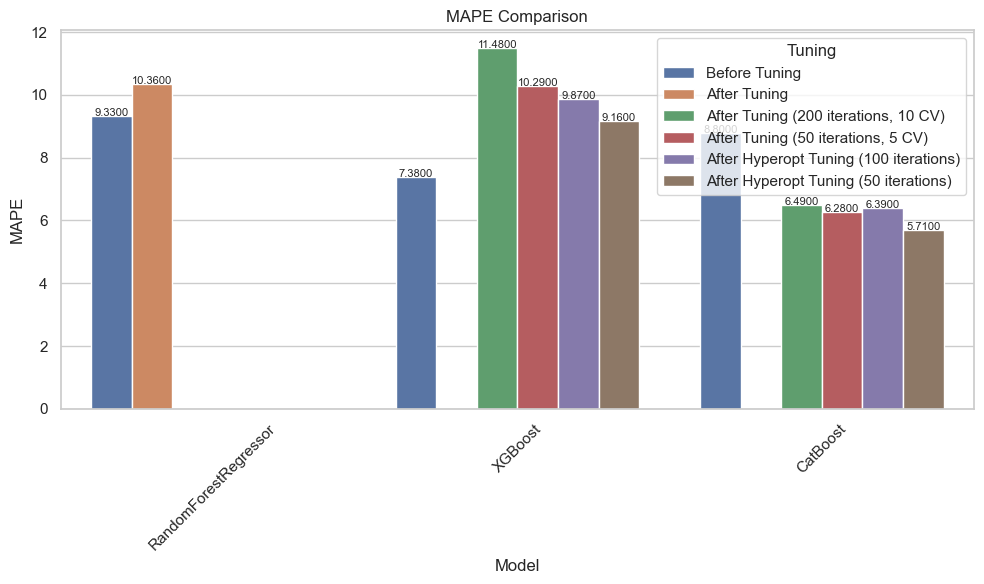

In [26]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MSE', hue='Tuning', data=df)
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8) 

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAE', hue='Tuning', data=df)
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R2', hue='Tuning', data=df)
plt.title('R2 Comparison')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAPE', hue='Tuning', data=df)
plt.title('MAPE Comparison')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  
plt.tight_layout()
plt.show()